In [1]:
# Import Everything we need

from DLTools.ScanAnalysis import *
from DLTools.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


In [2]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels.Run.1/*"))
ModelDirs=glob.glob("TrainedModels/*.1")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

In [3]:
# Prep the Models

# Rename the Models using Width and Depth
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: ['All_ChPi_AUC', 'All_Ele_AUC', 'All_Gamma_AUC', 'All_Pi0_AUC', 'All_Width', 'All_History.val_acc', 'All_History.loss', 'All_History.val_loss', 'All_History.acc', 'All_Depth']


In [4]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Ele_AUC', 'Width', 'Depth', 'Pi0_AUC', 'Epochs', 'Gamma_AUC', 'ChPi_AUC']


In [5]:
# Make a Table of all relevant parameters, sort by 1,2,then 0 columns.
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'Width', 'Depth', 'Epochs', 'Ele_AUC',  'Pi0_AUC', 'ChPi_AUC',  'Gamma_AUC'],[1,2,0])

Model Name           Width    Depth    Epochs    Ele_AUC    Pi0_AUC    ChPi_AUC    Gamma_AUC
-----------------  -------  -------  --------  ---------  ---------  ----------  -----------
Width=32 Depth=1        32        1        25     0.9857     0.9552      0.9977       0.9559
Width=32 Depth=2        32        2        13     0.9841     0.9474      0.9985       0.9510
Width=32 Depth=3        32        3         9     0.9627     0.8205      0.9965       0.9086
Width=32 Depth=4        32        4         9     0.9621     0.9015      0.9980       0.9037
Width=64 Depth=1        64        1        23     0.9875     0.9562      0.9985       0.9605
Width=64 Depth=2        64        2        12     0.9893     0.9646      0.9988       0.9656
Width=64 Depth=3        64        3         9     0.9833     0.9561      0.9984       0.9595
Width=64 Depth=4        64        4         7     0.9854     0.9577      0.9985       0.9585
Width=128 Depth=1      128        1        23     0.9922     0.9676   

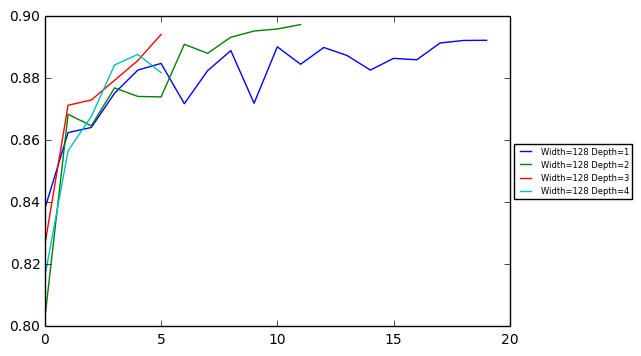

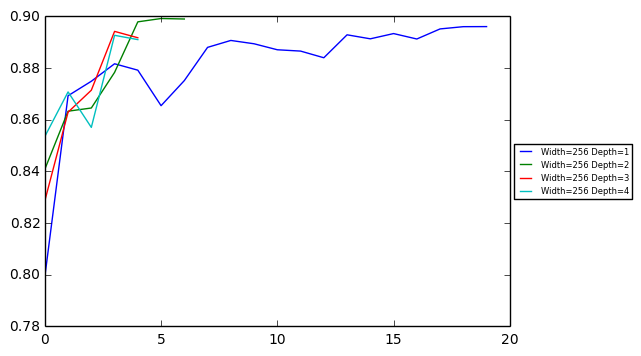

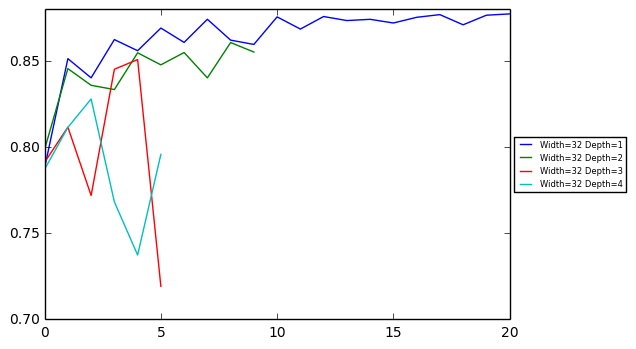

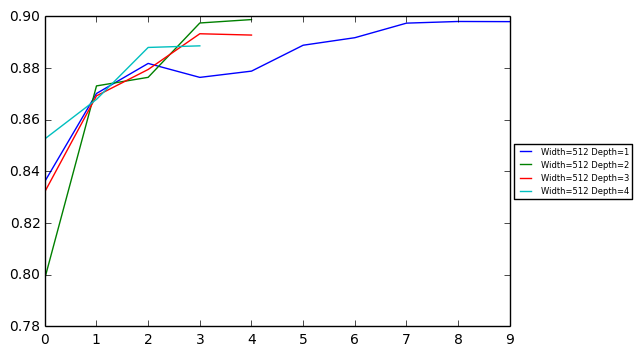

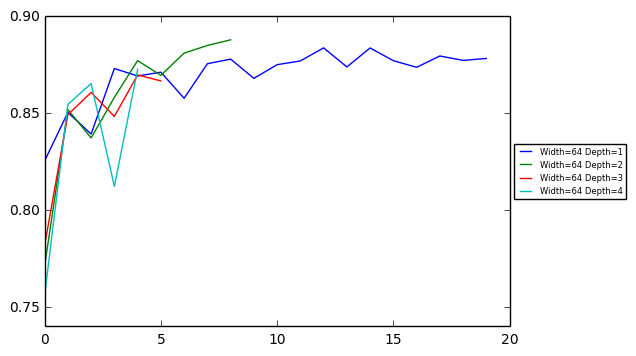

In [6]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
PlotMetaDataMany(MyModels,4,["All_History.val_acc"],loc="center left")

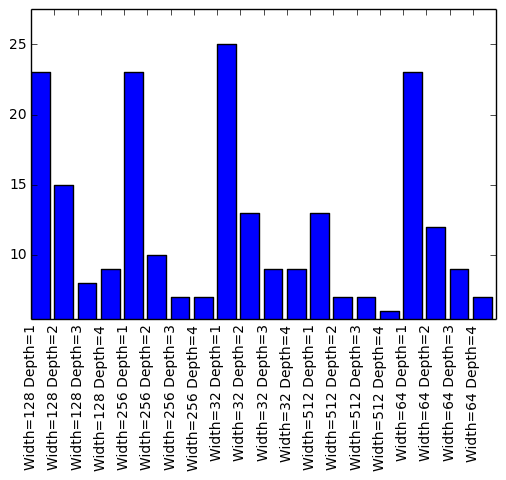

In [7]:
# Compare Number of Epochs each model ran (only last run)
PlotMetaData(MyModels,["Epochs"])

Ele_AUC


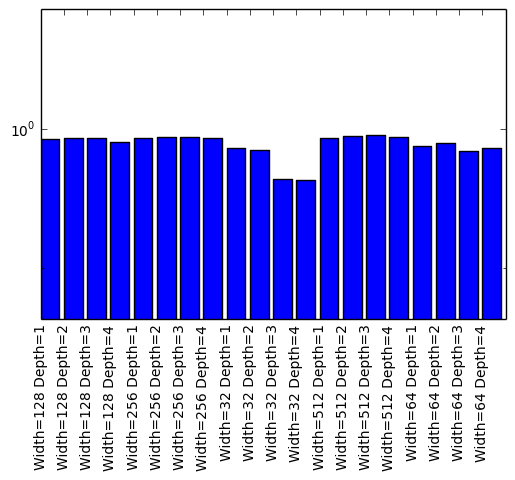

Pi0_AUC


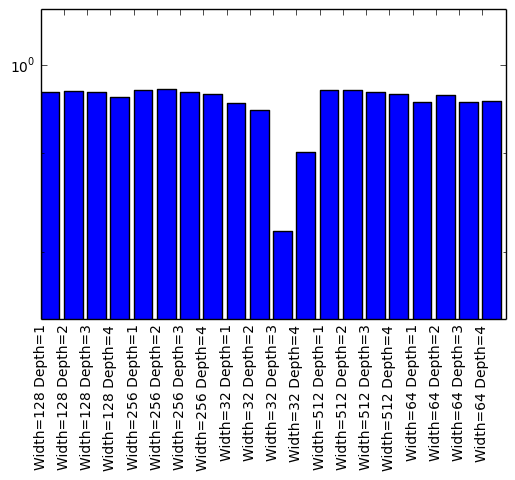

ChPi_AUC


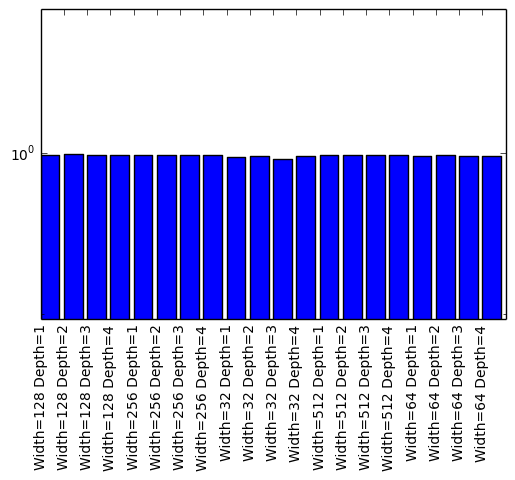

Gamma_AUC


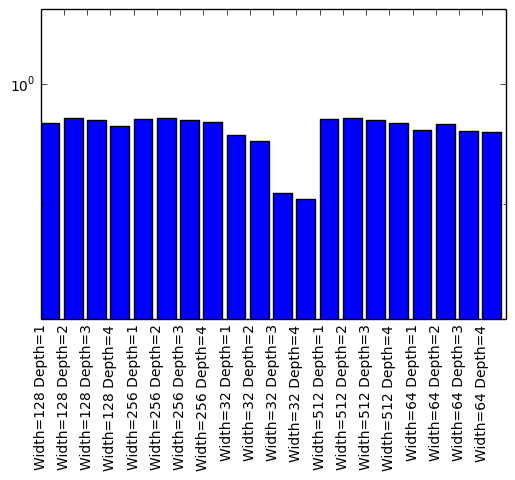

In [8]:
# Compare AUCs for all models
for p in ['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(MyModels,[p],log=True)
    plt.show()

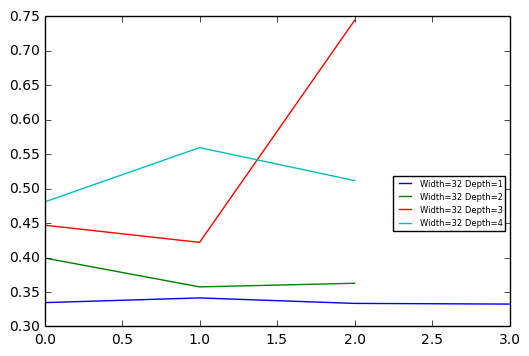

In [9]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==32, MyModels), ["History","val_loss"],loc=0)

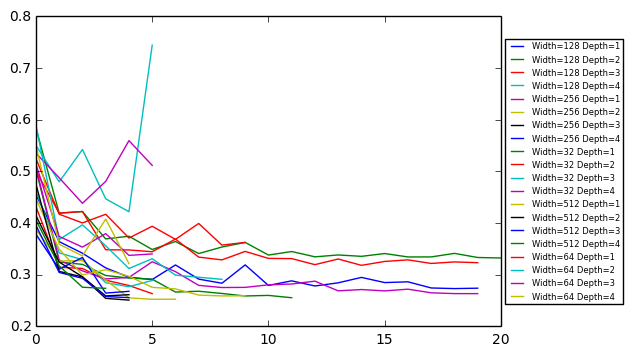

In [10]:
# Plot a varible for all trainings. This was pulled together above.
PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")